In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import statistics
import networkx as nx
#from pyvis.network import Network

In [2]:
df = pd.read_csv('./data/2021.01.19 spotify_us_all_fe.csv')
df = df[df['No. of Artists'] > 1]
df = df[list(df.columns[1:11]) + ['Song_days_onchart', 'Profit']]
df.head()

,Date,Track Name,Streams,Position,Artist Name,Artist No.,No. of Artists,Artist Genre,Track URI,Country,Song_days_onchart,Profit
0,2017-01-01,Lighthouse - Andrelli Remix,149929.0,183.0,Hearts & Colors,1,2,['viral pop'],04CttTezSnv71USiiG9mIo,United States,1,496.26499
1,2017-01-01,Lighthouse - Andrelli Remix,149929.0,183.0,Andrelli,2,2,['swedish pop'],04CttTezSnv71USiiG9mIo,United States,1,496.26499
2,2017-01-01,In the Name of Love,435945.0,27.0,Martin Garrix,1,2,"['big room', 'dance pop', 'edm', 'electro hous...",04DwTuZ2VBdJCCC5TROn7L,United States,1,1442.97795
3,2017-01-01,In the Name of Love,435945.0,27.0,Bebe Rexha,2,2,"['dance pop', 'electropop', 'pop', 'pop dance'...",04DwTuZ2VBdJCCC5TROn7L,United States,1,1442.97795
4,2017-01-01,Party,151474.0,178.0,Chris Brown,1,3,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",05Z7jet4VDNVgNQWcYHnrk,United States,1,501.37894


In [13]:
df['Sub-genres'] = df['Artist Genre']
df['Sub-genres'] = df['Sub-genres'].apply(lambda x: x.replace('[', ''))
df['Sub-genres'] = df['Sub-genres'].apply(lambda x: x.replace(']', ''))
df['Sub-genres'] = df['Sub-genres'].apply(lambda x: x.replace("'", ''))
df['Sub-genres'] = df['Sub-genres'].apply(lambda x: x.replace(', ', ' '))
df['Sub-genres'] = df['Sub-genres'].apply(lambda x: x.split(' '))
df['Top Sub-Genres'] = df['Sub-genres'].apply(lambda x: statistics.multimode(x))

In [18]:
genres = {'latin':'latin',
              'reggaeton': 'latin',
              'latino': 'latin',
              'ritmo': 'latin',
              'salsa': 'latin',
              'mexican': 'latin',
              'alternative': 'indie & alternative',
              'indie': 'indie & alternative',
              'experimental': 'indie & alternative',
              'atl': 'indie & alternative',
              'rock': 'rock & metal',
              'metal': 'rock & metal',
              'punk': 'rock & metal',
              'pop':'pop', 
              'blues':'blues & rhythm',
              'funk': 'blues & rhythm',
              'funky': 'blues & rhythm',
              'jazz': 'jazz',
              'country': 'country', 
              'folk':'folk', 
              'classical':'classical',
              'hip': 'hip hop & rap',
              'hop': 'hip hop & rap',
              'rap': 'hip hop & rap',
              'trap': 'hip hop & rap',
              'drill': 'hip hop & rap',
              'gospel': 'christian & gospel',
              'christian': 'christian & gospel',
              'dance': 'electronic, house & dance',
              'edm' : 'electronic, house & dance',
              'electronic': 'electronic, house & dance',
              'electropop': 'electronic, house & dance',
              'melbourne': 'electronic, house & dance',
              'bounce': 'electronic, house & dance',
              'house': 'electronic, house & dance',
              'grime': 'electronic, house & dance',
              'electro': 'electronic, house & dance',
              'electronica': 'electronic, house & dance',
              'trance': 'electronic, house & dance',
              'r&b': 'r&b & soul',
              'soul': 'r&b & soul',
              'soundtrack': 'soundtrack',
              'hollywood': 'soundtrack',
              'show': 'broadway',
              'tunes': 'broadway',
              'broadway': 'broadway',
              'disney': 'broadway',
              'k-pop': 'k-pop',
              'reggae': 'reggae'
         }

print('No. of Genres', len(set(genres.values())))

def pick_genre(sub_genres, genres=genres):
    
    if sub_genres == ['']:
        return 'unknown'
    
    for element in sub_genres:
        if element in list(genres.keys()):
            return genres[element]
        
    return 'other'
        

No. of Genres 17


In [19]:
df['Genre'] = df['Top Sub-Genres'].apply(pick_genre)
df['Year'] = df['Date'].apply(lambda x: int(x[0:4]))
df.head()

,Date,Track Name,Streams,Position,Artist Name,Artist No.,No. of Artists,Artist Genre,Track URI,Country,Song_days_onchart,Profit,Sub-genres,Top Sub-Genres,Genre,Year
0,2017-01-01,Lighthouse - Andrelli Remix,149929.0,183.0,Hearts & Colors,1,2,['viral pop'],04CttTezSnv71USiiG9mIo,United States,1,496.26499,"[viral, pop]","[viral, pop]",pop,2017
1,2017-01-01,Lighthouse - Andrelli Remix,149929.0,183.0,Andrelli,2,2,['swedish pop'],04CttTezSnv71USiiG9mIo,United States,1,496.26499,"[swedish, pop]","[swedish, pop]",pop,2017
2,2017-01-01,In the Name of Love,435945.0,27.0,Martin Garrix,1,2,"['big room', 'dance pop', 'edm', 'electro hous...",04DwTuZ2VBdJCCC5TROn7L,United States,1,1442.97795,"[big, room, dance, pop, edm, electro, house, p...","[pop, house]",pop,2017
3,2017-01-01,In the Name of Love,435945.0,27.0,Bebe Rexha,2,2,"['dance pop', 'electropop', 'pop', 'pop dance'...",04DwTuZ2VBdJCCC5TROn7L,United States,1,1442.97795,"[dance, pop, electropop, pop, pop, dance, post...",[pop],pop,2017
4,2017-01-01,Party,151474.0,178.0,Chris Brown,1,3,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",05Z7jet4VDNVgNQWcYHnrk,United States,1,501.37894,"[dance, pop, pop, pop, rap, r&b, rap]",[pop],pop,2017


In [358]:
def create_edgelist(data):
    
#     reduced_data = data[['Track URI', 'Artist Name', 'Genre']].drop_duplicates()
    
    #Create dictionary of track to genres of genres of artists
    track_genre = {}
    turi_list = list(reduced_data['Track URI'])
    g_list = list(reduced_data['Genre'])
    
    for i in range(len(reduced_data)):
    
        uri = turi_list[i]
        genre = g_list[i]
        
        if uri in track_genre:
            track_genre[uri].append(genre)
        else:
            track_genre[uri] = [genre]
            
    #Create Edgelist dataframee
    track_list = []
    genre1_list = []
    genre2_list = []
   

    for key, values in track_genre.items():
        for i in range(1, len(values)):
            track_list.append(key)
            genre1_list.append(values[0])
            genre2_list.append(values[i])
            
#         print('length of track_list:', len(track_list))
#         print('length of genre1_list:', len(genre1_list))
#         print('length of genre2_list:', len(genre2_list))
            
    
    edge_list = pd.DataFrame({'Track URI': track_list,
                              'Artist Genre': genre1_list, 
                              'Collaborator Genre': genre2_list})



    return edge_list
    

In [422]:
def generate_network(data, metric='count'):
    
    reduced_data = data[['Track URI', 'Artist Name', 'Genre']].drop_duplicates(ignore_index=True)
    
    #Create Nodes
    nodes_df = reduced_df.groupby(['Genre'])[['Artist Name']].count().reset_index(drop=False).rename(columns={'Artist Name': 'Count'})
    nodes_df['Size'] = nodes_df['Count'].apply(lambda x: 500*x**(1/2))
    
    #Create Edges
    edges_df = create_edgelist(reduced_data)
        
    #Plot Graph
    digraph = nx.DiGraph()
    
    #Add Nodes
    for i in range(len(nodes_df)):
        digraph.add_node(nodes_df.Genre[i], title=nodes_df.Genre[i], size=nodes_df.Size[i])
    
    #Draw Graph
    plt.style.use("dark_background")
    plt.figure(figsize=(80,40))
    
   
    if metric == 'count':
        edge_list = edges_df.groupby(['Artist Genre', 'Collaborator Genre'])[['Artist Genre', 'Collaborator Genre']].count().rename(columns={'Artist Genre': 'Count', 'Collaborator Genre':'Weight'}).reset_index(drop=False)
        edge_list_reduced = edge_list[edge_list['Artist Genre'] != edge_list['Collaborator Genre']].reset_index(drop=True)
        edge_list_reduced['Weight'] = edge_list_reduced['Count'].apply(lambda x: round(x/(max(edge_list['Count'])), 2))
        
#         #Add Edges
#         for i in range(len(edge_list_reduced)):
#             u = edge_list_reduced['Artist Genre'][i]
#             v = edge_list_reduced['Collaborator Genre'][i]
#             digraph.add_edge(u, v)
            
#         edge_colors = list(edge_list_reduced['Weight'])
        
    elif metric == 'streams':
        track_streams = data.groupby(['Track URI'])[['Streams']].sum().reset_index(drop=False)
        edge_list = edges_df.set_index('Track URI').join(track_streams.set_index('Track URI'))
        edge_list_reduced = edge_list[edge_list['Artist Genre'] != edge_list['Collaborator Genre']].reset_index(drop=True)
        
        weight_list = []
        streams_list = list(edge_list_reduced['Streams'])

        for s in streams_list:
            if s == 984872631.0:
                weight_list.append(1.00)
            elif s >= 106497511.5:
                weight_list.append(0.900)
            elif s >= 28713965.0:
                weight_list.append(0.750)
            elif s >= 6090071.5:
                weight_list.append(0.500)
            elif s >= 1376854.5:
                weight_list.append(0.250)
            elif s >= 633041.4:
                weight_list.append(0.100)
            elif s >= 287530.0:
                weight_list.append(0.100)

        edge_list_reduced['Weight'] = weight_list
        
    #Add Edges
    for i in range(len(edge_list_reduced)):
        u = edge_list_reduced['Artist Genre'][i]
        v = edge_list_reduced['Collaborator Genre'][i]
        digraph.add_edge(u, v)

    edge_colors = list(edge_list_reduced['Weight'])

    #pos = nx.random_layout(digraph)
    cmap=plt.cm.Wistia
    pos = nx.circular_layout(digraph)
    
    nx.draw_networkx(G=digraph,pos=pos, nodelist=list(nodes_df['Genre']), arrowsize=50,
                     node_size=list(nodes_df['Size']), node_color='#76984e', 
                     font_size=50, font_weight='bold', font_color='white', width=10, edge_color=edge_colors, edge_cmap=cmap)
    
    edges = nx.draw_networkx_edges(
        digraph,
        pos,
        node_size=list(nodes_df['Size']),
        arrowstyle="->",
        arrowsize=50,
        edge_color=edge_colors,
        edge_cmap=cmap,
        width=10,
    )

    pc = mpl.collections.PatchCollection(edges, cmap=cmap)
    #pc.set_array(edge_colors)
    cb = plt.colorbar(pc, shrink=0.7)
    cb.ax.tick_params(labelsize=50)
    cb.set_label('No. of Collaborations', rotation=270, size=50, labelpad=10)

    ax = plt.gca()
    ax.set_axis_off()
    plt.show()

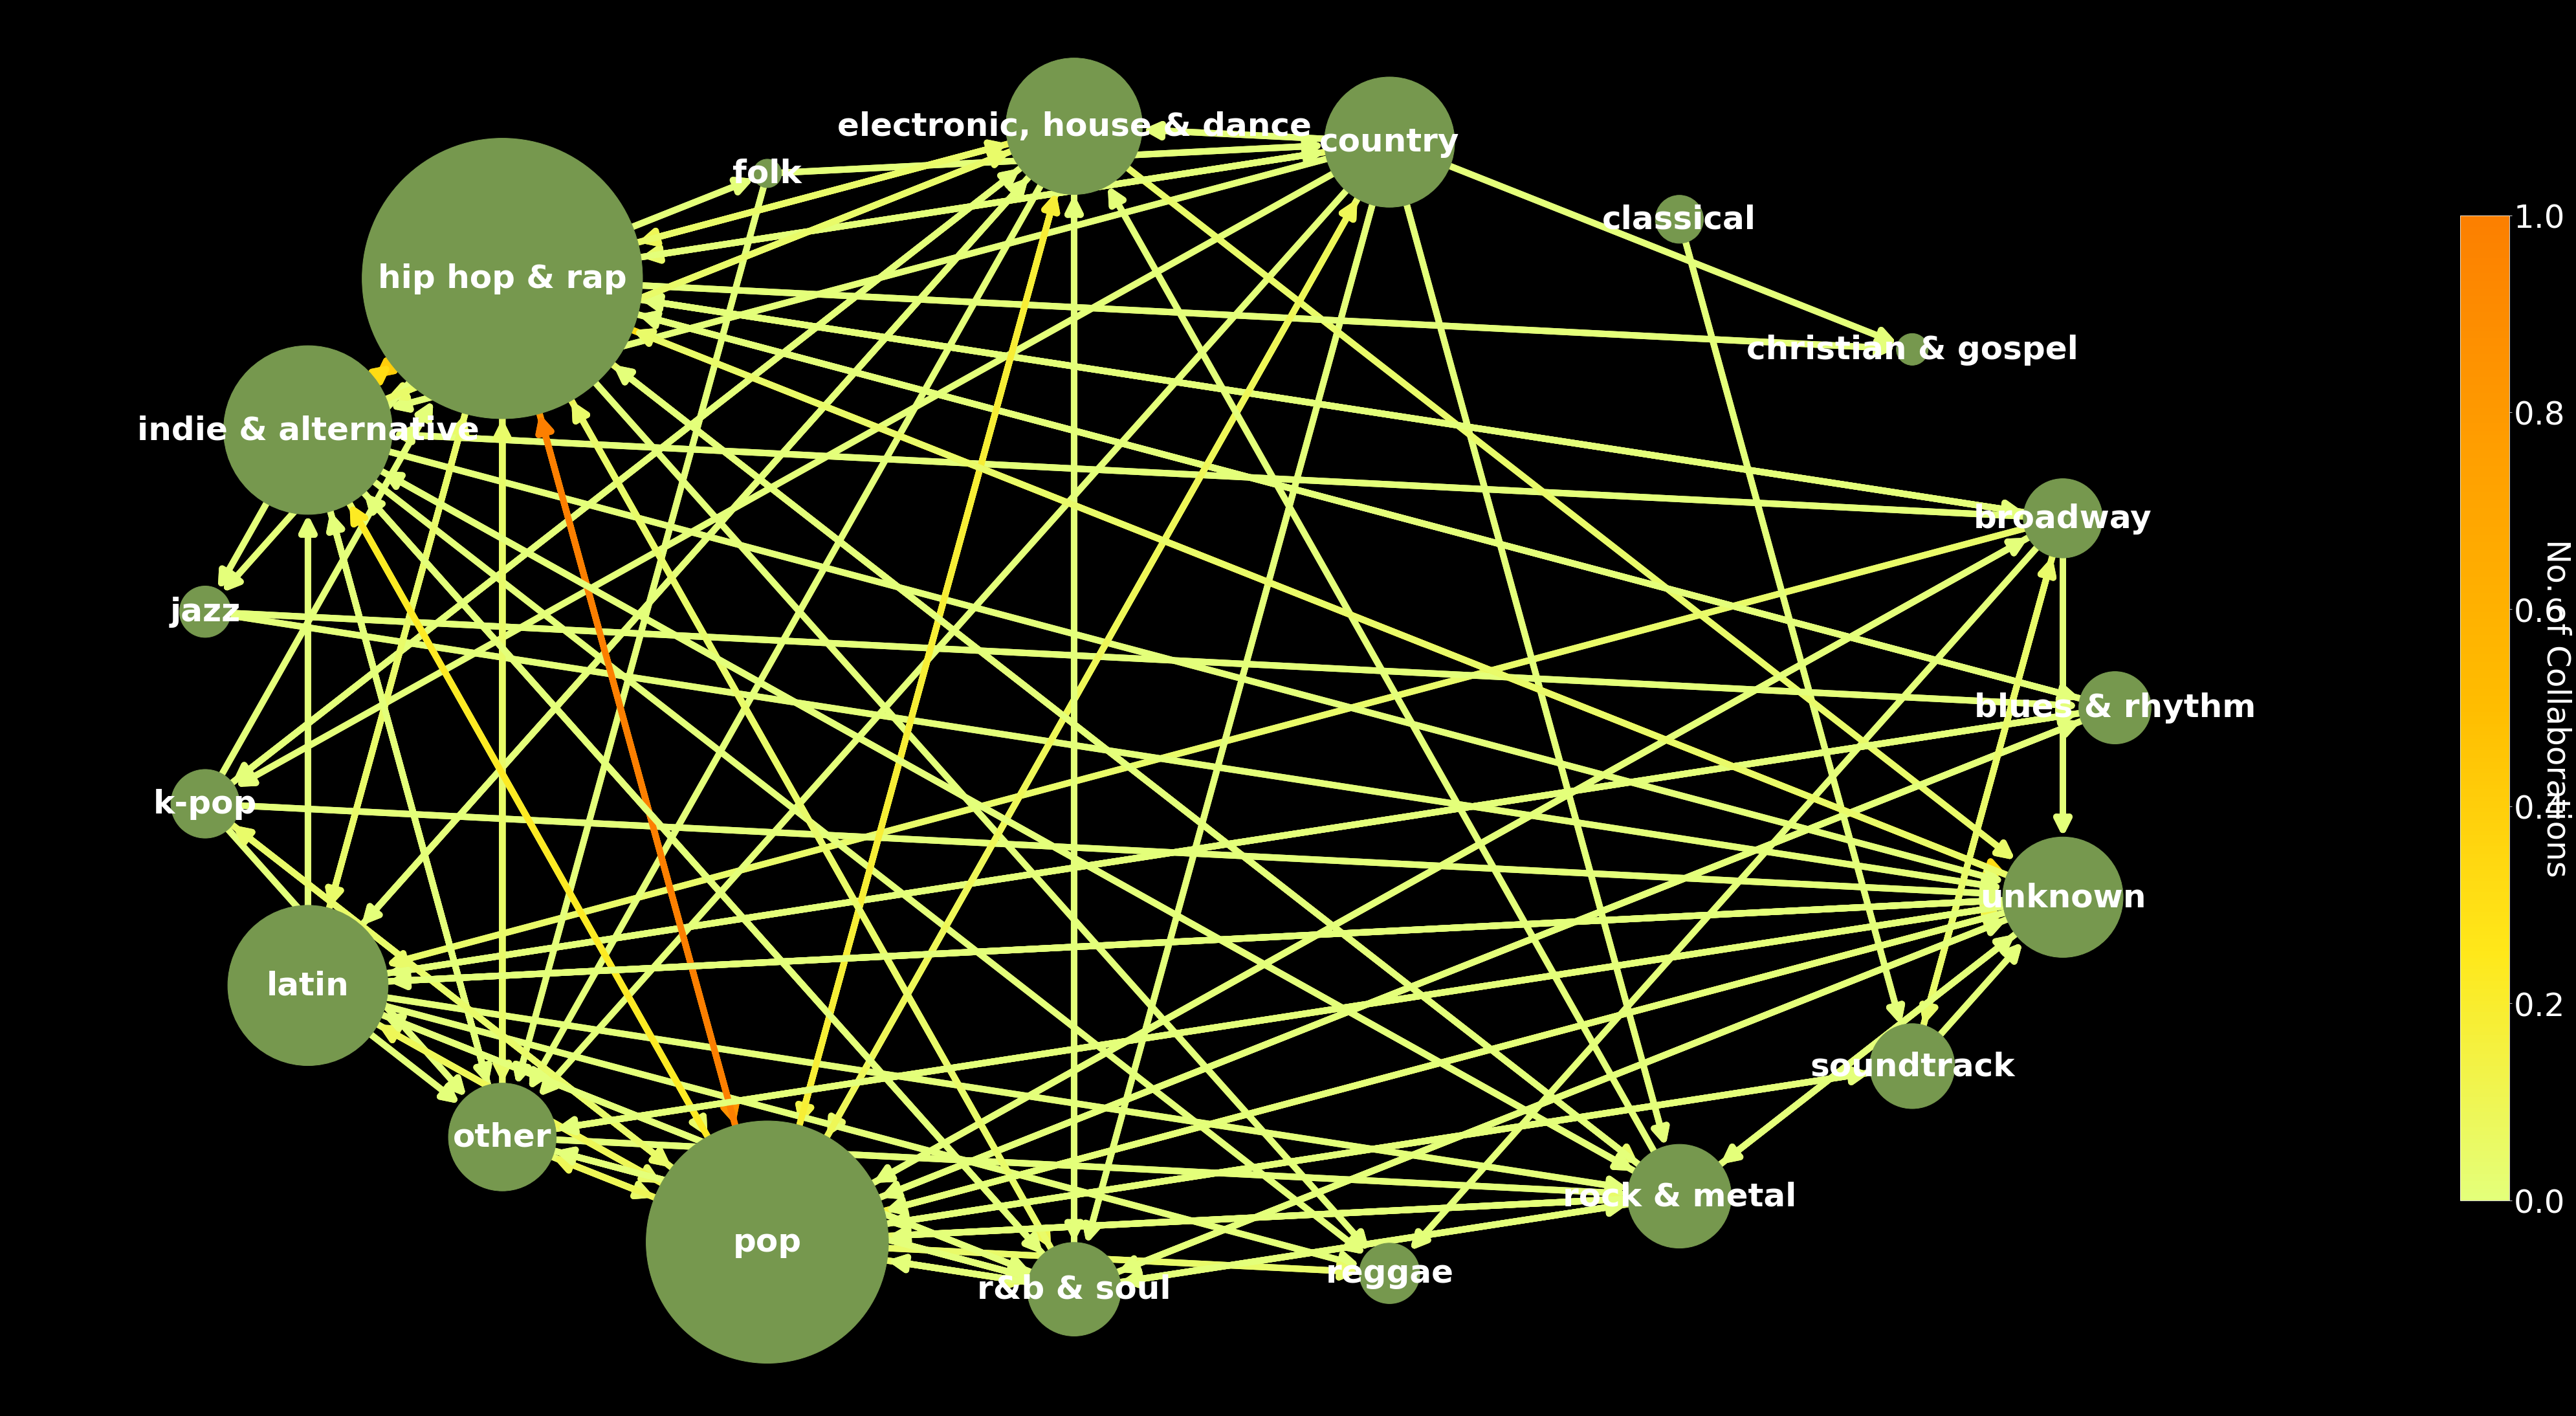

In [423]:
generate_network(df)

### The Goal
The network graph aims to help visualize cross-functional collaborations. There are two questions that is aimed to be answered: 

1. Which are the most common cross-genre collaborations?
2. Which cross-genre collaborations are the most common (determined by the cumulative number of streams)?

### The Method
Spotify Web API provides a list of sub-genres for each artist and in total in the amount to hundereds of unique sub-gneres. To simplify the visualization, each artist is assigned to one main genere (e.g. pop / hip hop). The network graph is directional graph which means that arrows are pointing from one node to another. An arrow that begins at one node and ends at another represents the tracks in which the main artist from one genre collaborates with another artist from another genre.

### Analysis
In terms of the number of collaborators involved, pop to hip-hop & rap collaborations (and vice versa) well exceend all other cross-genre collaborations. All other cross-genre collaborations pale in comparison. Afterwards, we see a high number of pop-indie&alt rock, but vice versa not as high. This means that more of the tracks on the Spotify Top Charts consist of pop artists have brought in indie&alt rock artists to collobarate with them than the other way around. We also see a high number of collaborations of pop-electronic, house & dance and indie & altrock-hip hop & rap. This isn't too much of surprise in part the genres mentioned are by far the most popular ones. Also, these genres seem to collaborate with other genres the most. However, the other major music genres such as latin, country, rock&metal, and r&b & soul don't have too many artists involved in collabration in comparisons to the ones mentioned.

In [454]:
reduced = df[['Track URI', 'Artist Name', 'Genre']].drop_duplicates(ignore_index=True)
edge_list = create_edgelist(reduced).drop_duplicates()
track_streams = df.groupby(['Track URI'])[['Streams']].sum().reset_index(drop=False)
joined_df = edge_list.set_index('Track URI').join(track_streams.set_index('Track URI'))
joined_df = joined_df[joined_df['Artist Genre'] != joined_df['Collaborator Genre']]#.reset_index(drop=True)
joined_df = joined_df.groupby(['Artist Genre', 'Collaborator Genre'])[['Streams']].sum().reset_index(drop=False)
joined_df = joined_df.sort_values(by=['Streams'], ascending=False).reset_index(drop=False)
joined_df.head(20)

,index,Artist Genre,Collaborator Genre,Streams
0,40,hip hop & rap,pop,1.215741e+10
1,81,pop,hip hop & rap,1.074781e+10
2,36,hip hop & rap,indie & alternative,7.578533e+09
3,46,indie & alternative,hip hop & rap,4.403220e+09
4,82,pop,indie & alternative,4.346003e+09
5,79,pop,country,2.657218e+09
6,84,pop,latin,2.061010e+09
7,25,"electronic, house & dance",pop,1.836727e+09
8,80,pop,"electronic, house & dance",1.697846e+09
9,44,hip hop & rap,unknown,1.452909e+09


In [455]:
joined_df.tail(20)

,index,Artist Genre,Collaborator Genre,Streams
94,113,unknown,rock & metal,2508564.0
95,78,pop,broadway,2394440.0
96,107,soundtrack,unknown,2313099.0
97,31,hip hop & rap,broadway,2267358.0
98,48,indie & alternative,other,2219387.0
99,11,country,christian & gospel,2147904.0
100,37,hip hop & rap,jazz,2013948.0
101,98,r&b & soul,unknown,1975028.0
102,72,other,indie & alternative,1933433.0
103,52,indie & alternative,rock & metal,1793218.0


The aim is to have a network graph that help visualize the table. The top streaming genree-genre collaborations echo the ones mentiond before. The surprising thing to note, however, is the latin and country are among the top 10 collaborators with each having worked with pop artists despite having very a low number of artists collaborating in comparison to the other major genres.